In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from pyproj import Transformer
import pandas as pd


%matplotlib inline
ox.__version__

'2.0.6'

In [2]:
place = [{"city": "San Sebastian", "country": "Spain"}]
G = ox.graph_from_place(place, network_type="drive")

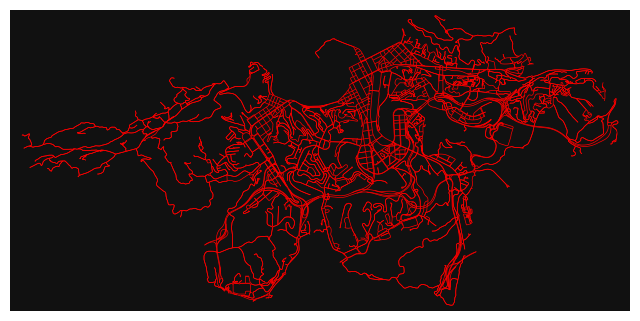

In [3]:
fig, ax = ox.plot_graph(
    G,
    edge_color="red",  # streets
    edge_linewidth=0.5,
    node_color="red",  # intersections
    node_size=0,  # size of nodes
)

In [4]:
G_walk = ox.graph_from_place(place, network_type="walk")

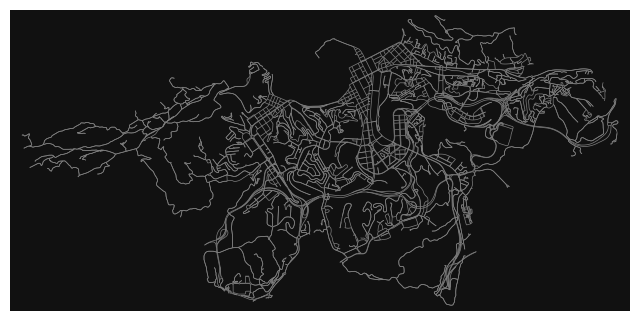

In [5]:
fig, ax = ox.plot_graph(
    G,
    edge_color="grey",  # streets
    edge_linewidth=0.5,
    node_color="grey",  # intersections
    node_size=0,  # size of nodes
)

In [6]:
G_bike = ox.graph_from_place(place, network_type="bike")

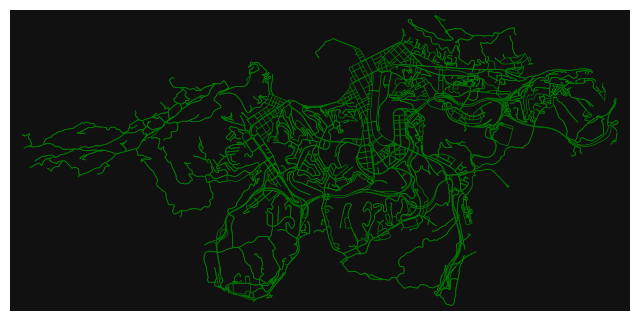

In [7]:
fig, ax = ox.plot_graph(
    G,
    edge_color="green",  # streets
    edge_linewidth=0.5,
    node_color="green",  # intersections
    node_size=0,  # size of nodes
)

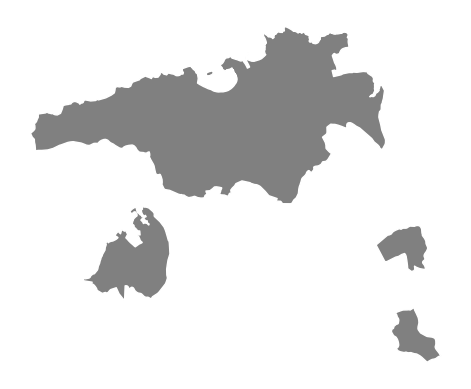

In [9]:
gdf = ox.geocode_to_gdf(place)
gdf_proj = gdf.to_crs(epsg=25830)
ax = gdf_proj.plot(fc="gray", ec="w")
_ = ax.axis("off")

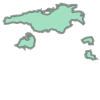

In [10]:
donosti_b = gdf.loc[0, "geometry"]
donosti_b

In [26]:
gdf.to_file("./data/donostifull-boundary.geojson")

DataSourceError: Failed to create GeoJSON datasource: ./data/donostifull-boundary.geojson: ./data/donostifull-boundary.geojson: No such file or directory

Edited with QGIS to remove the islands

In [12]:
# boundary_json = gpd.read_file('boundary_SS.geojson')

# Square boundary
boundary_json = gpd.read_file("./boundary/small_boundary.geojson")

In [16]:
poly = boundary_json.loc[0, "geometry"]

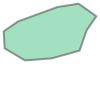

In [17]:
poly

<Axes: >

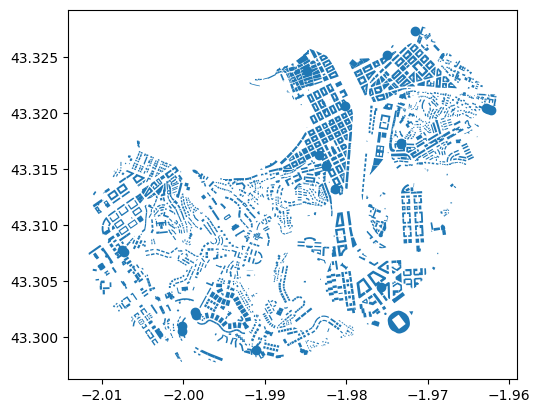

In [18]:
gdf_building = ox.features_from_polygon(poly, tags={"building": True})
gdf_building.plot()

In [19]:
gdf_building

geometry  \
element id                                                              
node    620097227                           POINT (-1.98021 43.32069)   
        811292250                           POINT (-2.00015 43.30055)   
        811292355                           POINT (-2.00021 43.30104)   
        827308244                           POINT (-1.97332 43.31732)   
        834662760                            POINT (-1.9985 43.30199)   
...                                                               ...   
way     1213256737  POLYGON ((-1.97533 43.31154, -1.97521 43.31156...   
        1213256738  POLYGON ((-1.97623 43.31144, -1.97573 43.31131...   
        1226623506  POLYGON ((-1.97078 43.30927, -1.97077 43.30922...   
        1227739953  POLYGON ((-2.00189 43.29976, -2.00176 43.29982...   
        1227739954  POLYGON ((-2.00227 43.29983, -2.00222 43.29986...   

                                   addr:city addr:country addr:housenumber  \
element id                                                                   
node    620097227   Donostia / San Sebastián           ES               11   
        811292250                        NaN          NaN              NaN   
        811292355                        NaN          NaN              NaN   
        827308244   Donostia / San Sebastián           ES               18   
        834662760   Donostia / San Sebastián           ES               55   
...                                      ...          ...              ...   
way     1213256737                       NaN          NaN              NaN   
        1213256738                       NaN          NaN              NaN   
        1226623506                       NaN          NaN              NaN   
        1227739953                       NaN          NaN              NaN   
        1227739954                       NaN          NaN              NaN   

                   addr:postcode          addr:street   b5m:id  \
element id                                                       
node    620097227          20004         Okendo kalea  D_40640   
        811292250            NaN                  NaN      NaN   
        811292355            NaN                  NaN      NaN   
        827308244          20012    Konkorrenea kalea  D_37005   
        834662760          20009  Berabera pasealekua  D_36239   
...                          ...                  ...      ...   
way     1213256737           NaN                  NaN      NaN   
        1213256738           NaN                  NaN      NaN   
        1226623506           NaN                  NaN      NaN   
        1227739953           NaN                  NaN      NaN   
        1227739954           NaN                  NaN      NaN   

                                                              b5m:url  \
element id                                                              
node    620097227   http://b5m.gipuzkoa.net/b5map/r1/eu/mapa/lekut...   
        811292250                                                 NaN   
        811292355                                                 NaN   
        827308244   http://b5m.gipuzkoa.net/b5map/r1/eu/mapa/lekut...   
        834662760   http://b5m.gipuzkoa.net/b5map/r1/eu/mapa/lekut...   
...                                                               ...   
way     1213256737                                                NaN   
        1213256738                                                NaN   
        1226623506                                                NaN   
        1227739953                                                NaN   
        1227739954                                                NaN   

                                                          b5m:urlOrto  \
element id                                                              
node    620097227   http://b5m.gipuzkoa.net/url5000/index.php?id=D...   
        811292250                                                 Na

In [ ]:
filtered_gdf_building = gdf_building[
    ~gdf_building["geometry"].astype(str).str.startswith("POINT")
]

<Axes: >

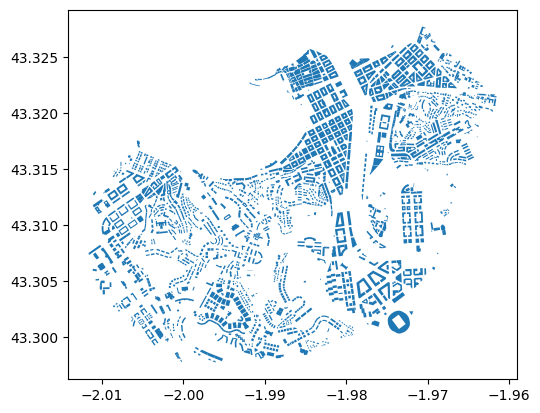

In [21]:
filtered_gdf_building.plot()

In [22]:
# save as a shapefile
filtered_gdf_building = filtered_gdf_building.applymap(
    lambda x: str(x) if isinstance(x, list) else x
)
filtered_gdf_building.drop(labels="nodes", axis=1).to_file(
    "./buildings-small.gpkg", driver="GPKG"
)

C:\Users\xbast\AppData\Local\Temp\ipykernel_11288\724237176.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_gdf_building = filtered_gdf_building.applymap(lambda x: str(x) if isinstance(x, list) else x)


KeyError: "['nodes'] not found in axis"

#POSTprocesses buildings in QGIS


In [23]:
G_clipped_drive = ox.graph_from_polygon(poly, network_type="drive")

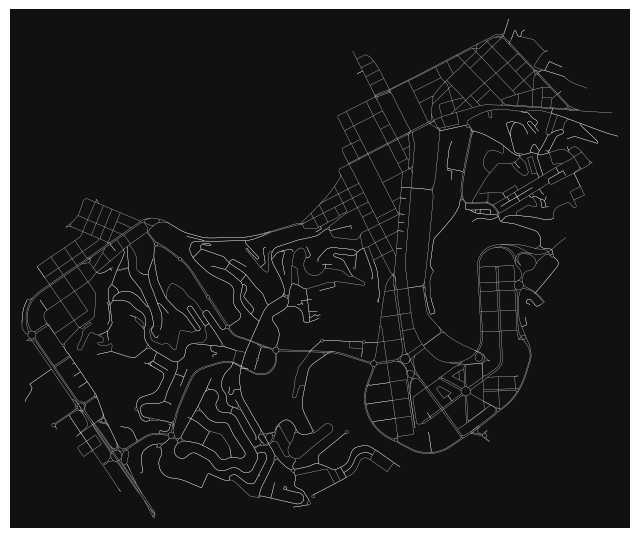

In [24]:
fig, ax = ox.plot_graph(
    G_clipped_drive, node_size=0, edge_color="w", edge_linewidth=0.2
)

In [25]:
G_hc_proj = ox.project_graph(G_clipped_drive)
ox.save_graph_shapefile(G_hc_proj, filepath="./roads/ss_drive_small.shp")

AttributeError: module 'osmnx' has no attribute 'save_graph_shapefile'

In [10]:
G_clipped_walk = ox.graph_from_polygon(poly, network_type="walk")

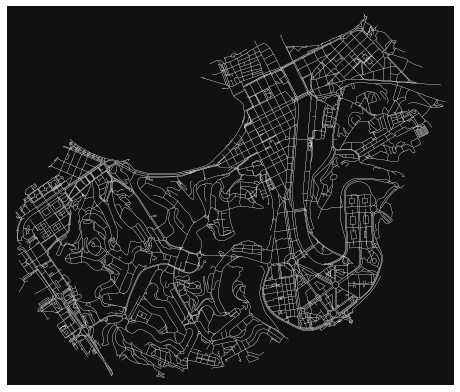

In [11]:
fig, ax = ox.plot_graph(G_clipped_walk, node_size=0, edge_color="w", edge_linewidth=0.2)

In [12]:
G_hc_proj = ox.project_graph(G_clipped_walk)
ox.save_graph_shapefile(G_hc_proj, filepath="./roads/ss_walk_small.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [13]:
G_clipped_bike = ox.graph_from_polygon(poly, network_type="bike")

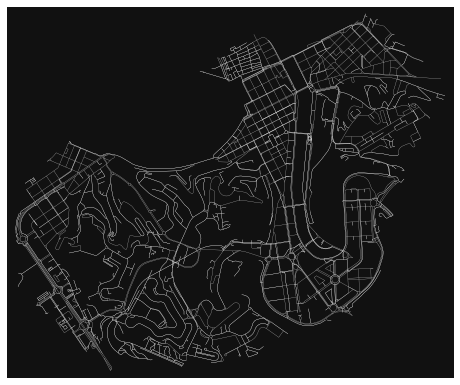

In [14]:
fig, ax = ox.plot_graph(G_clipped_bike, node_size=0, edge_color="w", edge_linewidth=0.2)

In [15]:
G_hc_proj = ox.project_graph(G_clipped_bike)
ox.save_graph_shapefile(G_hc_proj, filepath="./roads/ss_bike_small.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


FOOD DELIVERIES!!!!!! From now on.

In [30]:
from shapely.geometry import Point  # Polygon
import pandas as pd

In [ ]:
demand_raw = pd.read_csv("./Deliveries/SanSebastian_Sept2023granular.csv")
demand_raw

In [18]:
demand_raw = demand_raw.loc[demand_raw["order_final_status"] == "DeliveredStatus"]
len(demand_raw)

46814

In [19]:
demand_raw = demand_raw.loc[demand_raw["order_vertical"] == "Food"]
len(demand_raw)

43074

In [20]:
# Remove rows with NaN or empty values in specified columns
demand_raw = demand_raw.dropna(
    subset=[
        "pickup_latitude",
        "pickup_longitude",
        "delivery_latitude",
        "delivery_longitude",
    ]
)

# Reset the DataFrame index if you want
demand_raw = demand_raw.reset_index(drop=True)

len(demand_raw)

34519

In [21]:
demand_raw["order_activated_local_at"] = pd.to_datetime(
    demand_raw["order_activated_local_at"], format="%Y-%m-%d %H:%M:%S.%f UTC"
)
demand_raw["start_time"] = demand_raw["order_activated_local_at"].dt.strftime(
    "%Y-%m-%d %H:%M:%S"
)

In [22]:
# DATE FILTER
start_date = "2023-09-18 00:00:00"
end_date = "2023-09-25 00:00:00"
demand_raw = demand_raw[demand_raw["start_time"].between(start_date, end_date)]

# ROUNDTRIP FILTER
# demand_raw = demand_raw[demand_raw["start station id"] != demand_raw["end station id"]]

In [ ]:
demand_raw

In [24]:
# add new column to df
demand_raw["withinC"] = ""

# Determine if it is inside or not
startwithinClist = []
for lon, lat in zip(demand_raw["pickup_longitude"], demand_raw["pickup_latitude"]):
    pt = Point(lon, lat)
    startwithinC = pt.within(poly)
    # print( withinQ )
    startwithinClist.append(startwithinC)

# update values in the that column, values: True/False
demand_raw["withinC"] = startwithinClist

In [ ]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_start_within = demand_raw[demand_raw.withinC == True]
demand_start_within

In [ ]:
# add new column to df
demand_start_within["withinCend"] = ""

# Determine if it is inside or not
endwithinClist = []
for lon, lat in zip(
    demand_start_within["delivery_longitude"], demand_start_within["delivery_latitude"]
):
    pt = Point(lon, lat)
    endwithinC = pt.within(poly)
    # print( withinQ )
    endwithinClist.append(endwithinC)

# update values in the that column, values: True/False
demand_start_within["withinCend"] = endwithinClist

In [ ]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_ss = demand_start_within[demand_start_within.withinCend == True]
demand_ss

In [28]:
# Order by starttime
demand_ss = demand_ss.sort_values(by="start_time", ascending=True)

In [29]:
# Drop
demand_ss = demand_ss.drop(
    columns=["order_activated_local_at", "withinC", "withinCend"]
)

In [30]:
# Reorder columns to move 'starttime' to the first position
demand_ss = demand_ss[
    ["start_time"] + [col for col in demand_ss.columns if col != "start_time"]
]

In [31]:
demand_ss = demand_ss.rename(
    columns={
        "pickup_latitude": "start_latitude",
        "pickup_longitude": "start_longitude",
        "delivery_latitude": "end_latitude",
        "delivery_longitude": "end_longitude",
    }
)

In [ ]:
demand_ss

In [33]:
demand_ss["day"] = pd.to_datetime(demand_ss["start_time"]).dt.day - 17

In [ ]:
demand_ss.head()

In [35]:
demand_ss.to_csv(
    "./Deliveries/delivery_demand_ss_1week_scattered_small.csv", index=False
)

DELIVERIES!!! Ended

In [ ]:
stations = pd.read_csv("./Rides/estaciones.csv")
stations

In [33]:
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326")


def transform_coordinates(row):
    lat, lon = transformer.transform(row["X"], row["Y"])
    return pd.Series({"Latitude": lat, "Longitude": lon})


stations[["Latitude", "Longitude"]] = stations.apply(transform_coordinates, axis=1)

In [ ]:
stations

In [44]:
stations.loc[stations["ID"] == 75, ["Latitude", "Longitude"]] = [43.314847, -1.979881]

In [ ]:
stations

In [46]:
stations = stations.rename(columns={"NumPlazas": "Total docks"})

In [ ]:
stations.head(2)

In [34]:
stations.to_csv("./Rides/stations_ed.csv", index=False)

In [35]:
demand_rides = pd.read_csv("./Rides/ride_demand_ss_1week_scattered.csv")

In [ ]:
# demand_rides = pd.read_csv("./Rides/datos_2022.csv",  sep = ";",encoding="ISO-8859-1")
demand_rides

In [ ]:
# demand_rides.columns
print(demand_rides["start_building"].unique())

<bound method Series.unique of 0         454
1        2933
2        4206
3        1901
4        1602
         ... 
19293      93
19294       2
19295     528
19296     953
19297     434
Name: start_building, Length: 19298, dtype: int64>


In [82]:
demand_rides = demand_rides.rename(columns={"ID": "ID_viaje"})

In [83]:
demand_rides.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'start_building', 'target_building'],
      dtype='object')

In [84]:
# Start station
demand_rides = demand_rides.merge(
    stations[["ID", "Latitude", "Longitude"]],
    left_on="Id de estacion de inicio",
    right_on="ID",
    how="left",
)
demand_rides = demand_rides.rename(
    columns={"Latitude": "start_lat", "Longitude": "start_lon"}
)

# End station
demand_rides = demand_rides.merge(
    stations[["ID", "Latitude", "Longitude"]],
    left_on="Id de estacion de fin de viaje",
    right_on="ID",
    how="left",
)
demand_rides = demand_rides.rename(
    columns={"Latitude": "target_lat", "Longitude": "target_lon"}
)

In [85]:
demand_rides.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'start_building', 'target_building', 'ID_x', 'start_lat', 'start_lon',
       'ID_y', 'target_lat', 'target_lon'],
      dtype='object')

In [86]:
# Drop the duplicate 'station_id' columns
demand_rides = demand_rides.drop(columns=["ID_x", "ID_y"])

In [87]:
demand_rides

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,target_lon,starttime,withinC,withinCend,start_building,target_building,start_lat,start_lon,target_lat,target_lon
0,0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,...,-1.965375,2022-09-19 06:00:00,True,True,454,2894,43.312025,-1.972148,43.317856,-1.977321
1,1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,...,-1.982686,2022-09-19 06:03:00,True,True,2933,3645,43.316951,-1.971451,43.313289,-1.981765
2,2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,...,-1.954590,2022-09-19 06:04:00,True,True,4206,1222,43.321269,-1.959826,43.316630,-1.953499
3,3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,...,-1.968803,2022-09-19 06:05:00,True,True,1901,1572,43.316951,-1.971451,43.317038,-1.975053
4,4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,...,-1.968788,2022-09-19 06:08:00,True,True,1602,4856,43.316951,-1.971451,43.310829,-1.967450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,19350,217450,1186178,NORMAL,230,2,2022-09-25 23:56:00,02 - BRETXA,25/09/2022 23:59,14.0,...,-1.967924,2022-09-25 23:56:00,True,True,93,963,43.322867,-1.982435,43.323776,-1.971474
19294,19351,217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,...,-1.986846,2022-09-25 23:57:00,True,True,2,5853,43.319248,-1.980686,43.308489,-1.983002
19295,19352,217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,...,-1.967964,2022-09-25 23:57:00,True,True,528,885,43.322755,-1.975424,43.316951,-1.971451
19296,19353,217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,...,-1.986968,2022-09-25 23:58:00,True,True,953,3663,43.324163,-1.973362,43.311096,-1.980431


In [88]:
# demand_rides['Fecha de inicio'] = pd.to_datetime(demand_rides['Fecha de inicio'], format='%d/%m/%Y %H:%M')
# demand_rides['starttime'] = demand_rides['Fecha de inicio'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [89]:
# DATE FILTER
start_date = "2022-09-19 00:00:00"
end_date = "2022-09-26 00:00:00"
demand_rides = demand_rides[demand_rides["starttime"].between(start_date, end_date)]

In [90]:
# Order by starttime
demand_rides = demand_rides.sort_values(by="starttime", ascending=True)

In [91]:
demand_rides

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,target_lon,starttime,withinC,withinCend,start_building,target_building,start_lat,start_lon,target_lat,target_lon
0,0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,...,-1.965375,2022-09-19 06:00:00,True,True,454,2894,43.312025,-1.972148,43.317856,-1.977321
1,1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,...,-1.982686,2022-09-19 06:03:00,True,True,2933,3645,43.316951,-1.971451,43.313289,-1.981765
2,2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,...,-1.954590,2022-09-19 06:04:00,True,True,4206,1222,43.321269,-1.959826,43.316630,-1.953499
3,3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,...,-1.968803,2022-09-19 06:05:00,True,True,1901,1572,43.316951,-1.971451,43.317038,-1.975053
4,4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,...,-1.968788,2022-09-19 06:08:00,True,True,1602,4856,43.316951,-1.971451,43.310829,-1.967450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,19350,217450,1186178,NORMAL,230,2,2022-09-25 23:56:00,02 - BRETXA,25/09/2022 23:59,14.0,...,-1.967924,2022-09-25 23:56:00,True,True,93,963,43.322867,-1.982435,43.323776,-1.971474
19294,19351,217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,...,-1.986846,2022-09-25 23:57:00,True,True,2,5853,43.319248,-1.980686,43.308489,-1.983002
19295,19352,217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,...,-1.967964,2022-09-25 23:57:00,True,True,528,885,43.322755,-1.975424,43.316951,-1.971451
19296,19353,217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,...,-1.986968,2022-09-25 23:58:00,True,True,953,3663,43.324163,-1.973362,43.311096,-1.980431


In [92]:
# ROUNDTRIP FILTER
demand_rides = demand_rides[
    demand_rides["Id de estacion de inicio"]
    != demand_rides["Id de estacion de fin de viaje"]
]
demand_rides.shape

(19298, 29)

In [62]:
# Just for clipping
# demand_rides = pd.read_csv('./Rides/ride_demand_ss_1week_scattered.csv')

In [96]:
# Location filters

# add new column to df
demand_rides["withinC"] = ""

# Determine if it is inside or not
startwithinClist = []
for lon, lat in zip(demand_rides["start_lon"], demand_rides["start_lat"]):
    pt = Point(lon, lat)
    startwithinC = pt.within(poly)
    # print( withinQ )
    startwithinClist.append(startwithinC)

# update values in the that column, values: True/False
demand_rides["withinC"] = startwithinClist

TypeError: must be real number, not str

In [95]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_start_within = demand_rides[demand_rides.withinC == True]
demand_start_within

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,target_lon,starttime,withinC,withinCend,start_building,target_building,start_lat,start_lon,target_lat,target_lon


In [65]:
# add new column to df
demand_start_within["withinCend"] = ""

# Determine if it is inside or not
endwithinClist = []
for lon, lat in zip(
    demand_start_within["target_lon"], demand_start_within["target_lat"]
):
    pt = Point(lon, lat)
    endwithinC = pt.within(poly)
    # print( withinQ )
    endwithinClist.append(endwithinC)

# update values in the that column, values: True/False
demand_start_within["withinCend"] = endwithinClist

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [66]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_ss_rides = demand_start_within[demand_start_within.withinCend == True]
demand_ss_rides

,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,Nombre de estacion de fin de viaje,ID de ciclista,...,Moto identificador publico,Modelo de bicicleta,Nombre de producto,start_lat,start_lon,target_lat,target_lon,starttime,withinC,withinCend
237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,19 - FRANTZIA PASEALEKUA,21767,...,748.0,EFIT,Dbizi Ordinario,43.312025,-1.972148,43.317856,-1.977321,2022-09-19 06:00:00,True,True
237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,09 - EASO,2133,...,77.0,FIT,Ordinario,43.316951,-1.971451,43.313289,-1.981765,2022-09-19 06:03:00,True,True
237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,20 - TABAKALERA,15465,...,746.0,EFIT,Dbizi Ocasional,43.316951,-1.971451,43.317038,-1.975053,2022-09-19 06:05:00,True,True
237513,1164535,NORMAL,539,27,2022-09-19 06:10:00,27 - PODAVINES,19/09/2022 6:19,19.0,19 - FRANTZIA PASEALEKUA,14053,...,738.0,EFIT,Ordinario,43.302707,-1.979912,43.317856,-1.977321,2022-09-19 06:10:00,True,True
237512,1164550,NORMAL,336,21,2022-09-19 06:24:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:30,11.0,11 - SAN FRANTZISKO-IPARRAGIRRE,21479,...,53.0,FIT,Dbizi Ocasional,43.316951,-1.971451,43.322755,-1.975424,2022-09-19 06:24:00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,24 - MORLANS,13945,...,188.0,FIT,Ordinario,43.319248,-1.980686,43.308489,-1.983002,2022-09-25 23:57:00,True,True
217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,22702,...,820.0,EFIT,Dbizi Ocasional,43.322755,-1.975424,43.316951,-1.971451,2022-09-25 23:57:00,True,True
217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,22 - ANTSO JAKITUNA / SANCHO EL SABIO,18255,...,271.0,FIT,Dbizi Ocasional,43.324163,-1.973362,43.311096,-1.980431,2022-09-25 23:58:00,True,True
217446,1186182,NORMAL,229,6,2022-09-25 23:58:00,06 - ARRASATE,26/09/2022 0:02,10.0,10 - PEÑA Y GOÑI,3701,...,755.0,EFIT,Dbizi Ordinario,43.318344,-1.981523,43.322724,-1.977299,2022-09-25 23:58:00,True,True


In [67]:
demand_ss_rides.to_csv("./Rides/ride_demand_ss_1_week_scattered_small.csv")

****************************************************************************************************************************************************